# **Data Analyst Project: Business Decision Research**

DQLab sport centre is a store that sells various sports needs such as jackets, clothes, bags, and shoes. This shop started selling since 2013, so it has had regular customers for a long time, and is still trying to get new customers until now.

The goal of the analysis is to understand the reasons for the decline in repeat purchases and identify potential churned customers. By examining customer behavior, purchase patterns, and metrics such as average transaction amount and count of transactions. The aims are  to provide insights and recommendations to improve customer retention and increase repeat purchases for DQLab Sport Center.

**OVERVIEW**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

In [2]:
data = pd.read_csv ('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

In [3]:
data.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


**DATA UNDERSTANDING**

In [4]:
# load dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


It indicated that there are 1000 rows and 8 columns

In [5]:
# describe the dataframe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no,100000.0,5.000050e+04,2.886766e+04,1.000000e+00,2.500075e+04,5.000050e+04,7.500025e+04,1.000000e+05
Row_Num,100000.0,5.000050e+04,2.886766e+04,1.000000e+00,2.500075e+04,5.000050e+04,7.500025e+04,1.000000e+05
Customer_ID,100000.0,1.930840e+05,2.007473e+05,6.540000e+02,6.099450e+04,1.214410e+05,1.960230e+05,8.462130e+05
First_Transaction,100000.0,1.492184e+12,3.948432e+10,1.362729e+12,1.467106e+12,1.499012e+12,1.523675e+12,1.549061e+12
Last_Transaction,100000.0,1.509970e+12,3.563295e+10,1.362729e+12,1.491482e+12,1.518611e+12,1.539695e+12,1.549065e+12
Average_Transaction_Amount,100000.0,1.373157e+06,1.544435e+06,0.000000e+00,4.783038e+05,9.059370e+05,1.636372e+06,4.881014e+07
Count_Transaction,100000.0,1.169850e+01,3.541732e+01,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,3.852000e+03


In [6]:
data.describe(include='object').T

,count,unique,top,freq
Product,100000,4,Sepatu,49154


In [7]:
pd.DataFrame({'Features' : data.columns, 'DataType': data.dtypes,
              'NullValue': [data[i].isnull().sum() for i in data.columns],
              'Unique': [data[i].nunique() for i in data.columns] ,
              'UniqueSample': [list(pd.Series(data[i].unique()).sample()) for i in data.columns]}).reset_index(drop=True)

,Features,DataType,NullValue,Unique,UniqueSample
0,no,int64,0,100000,[30225]
1,Row_Num,int64,0,100000,[74440]
2,Customer_ID,int64,0,73194,[132837]
3,Product,object,0,4,[Baju]
4,First_Transaction,int64,0,99795,[1419483929289]
5,Last_Transaction,int64,0,99788,[1456750200080]
6,Average_Transaction_Amount,int64,0,96417,[761639]
7,Count_Transaction,int64,0,334,[5]


From the First and Last Transaction column, we know that the data is still integer. So we'll change the data type to datetime

In [8]:
# Change the Data Type of First and Last Transaction Colum

data['First_Transaction'] = pd.to_datetime(data['First_Transaction']/1000, unit='s', origin = '1970-01-01')
data['Last_Transaction'] = pd.to_datetime(data['Last_Transaction']/1000, unit='s', origin = '1970-01-01')


In [9]:
# Clear the unecesary data
del data['no']
del data['Row_Num']

In [10]:
# Pengecekan transaksi terakhir dalam dataset
print(max(data['Last_Transaction']))

2019-02-01 23:57:57.286000128


We'll assume that we use the churn parameter on 2018-08-01

In [11]:
# classified customer churned status
data.loc[data['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
data.loc[data['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

In [12]:
data.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


**DATA VISUALIZATION**

**Customer Acquisition by Year**

By analyzing customer acquisition by year, we aim to gain insights into the growth and trends of acquiring new customers over time.

In [13]:
data['Year_First_Transaction'] = data['First_Transaction'].dt.year
data['Year_Last_Transaction'] = data['Last_Transaction'].dt.year

In [14]:
data.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False,2016,2018
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False,2014,2018
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False,2017,2019
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False,2015,2018


In [15]:
data_year = data.groupby(['Year_First_Transaction'])['Customer_ID'].count()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
 6   is_churn                    100000 non-null  object        
 7   Year_First_Transaction      100000 non-null  int64         
 8   Year_Last_Transaction       100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.9+ MB


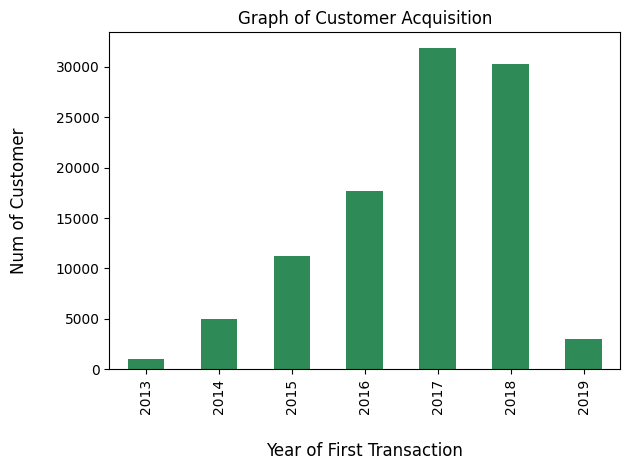

In [17]:
data_year = data.groupby(['Year_First_Transaction'])['Customer_ID'].count()
data_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition', color = 'seagreen')
plt.xlabel('Year of First Transaction', labelpad= 20, fontsize=12)
plt.ylabel('Num of Customer', labelpad=20, fontsize = 12)
plt.tight_layout()
plt.show()

The growth in customer acquisition from 2013 to 2017 looks very good because it is always increasing. The biggest increase was in 2016-2017 where there was an increase of almost 1000 customers. However, in 2017-2018 there was a slight decrease. In 2019, the increase in customers was not too large because the data was taken at the beginning of 2019.

**Transaction by Year**

By analyzing transactions by year, we aim to obtain several valuable outputs that can provide insights into the sales performance and trends of DQLab Sport Center over time.

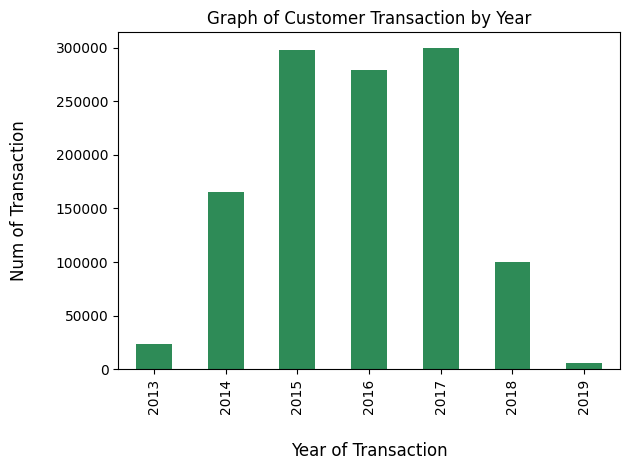

In [18]:
data_year = data.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
data_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Customer Transaction by Year', color = 'seagreen')
plt.xlabel('Year of Transaction', labelpad= 20, fontsize=12)
plt.ylabel('Num of Transaction', labelpad=20, fontsize = 12)
plt.tight_layout()
plt.show()

It can be seen from the output that customer transactions have dynamic changes every year. The largest sales were in 2015 and 2017. Where in 2013-2017 there was quite good growth, but in 2018 there was a drastic decline of around 67%. In the next visualisation, we can see which product experiences a decline.

**Average Transaction Amount by Year**

By analyzing the average transaction amount by year, we aim to obtain several key outputs that can provide insights into the spending behavior and trends of customers at DQLab Sport Center over time.

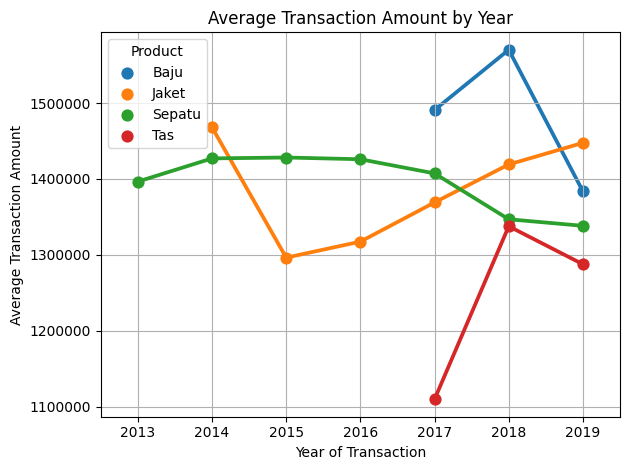

In [19]:
sns.pointplot(data = data.groupby(['Product', 'Year_First_Transaction'])['Average_Transaction_Amount'].mean().reset_index(),
                                 x='Year_First_Transaction', y= 'Average_Transaction_Amount', hue='Product')
plt.title('Average Transaction Amount by Year')
plt.xlabel('Year of Transaction')
plt.ylabel('Average Transaction Amount')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.grid(True)
plt.tight_layout()
plt.show()

Product transactions tend to fluctuate. What can be highlighted is that in the 2018-2019 period, when other products experienced a decline in sales, footwear sales increased, even if the figures were not significant.It can be said that the trend in footwear products during this period still had a good impact.

**Customer Churned Proportion in Each Product**


By analyzing the customer churned proportion in each product, we aim to obtain insights into the retention rates and customer behavior for different products at DQLab Sport Center.

In [20]:
data_pivot = data.pivot_table(index='is_churn', columns='Product', values='Customer_ID', aggfunc='count')

In [21]:
plot_product = data_pivot.count().sort_values(ascending=False).head(5).index

In [22]:
data_pivot = data_pivot.reindex(columns=plot_product)

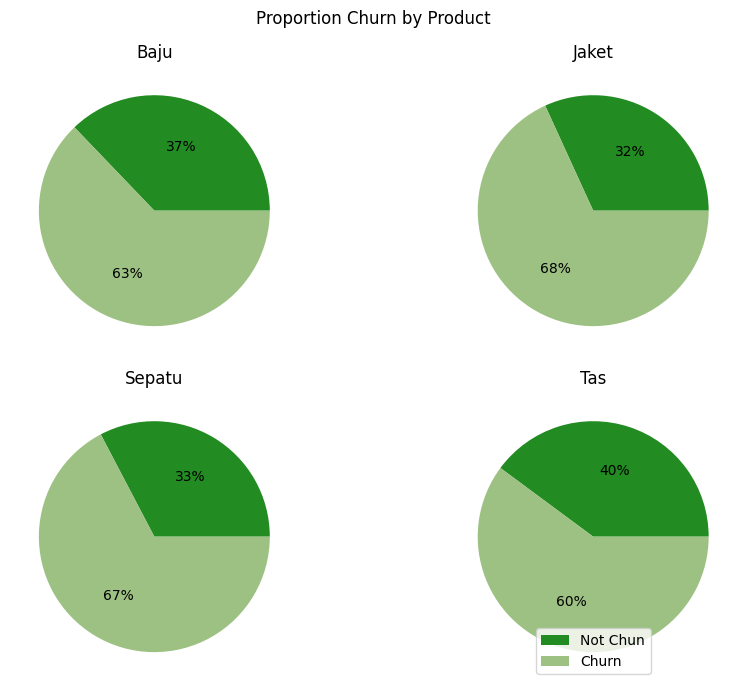

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Proportion Churn by Product')

colors = ['#228B22','#9DC183']

axs = axs.ravel()
for i, product in enumerate(plot_product):
    axs[i].pie(data_pivot[product], labels=None, autopct='%1.0f%%', colors=colors)
    axs[i].set_title(product)

plt.legend(labels=['Not Chun', 'Churn'], loc='lower center')
plt.tight_layout()
plt.show()

Proportion of churned customers for each product. Jackets and shoes are known to have the highest churn rates. This is a concern in order to increase campaigns or promotions on these products.

**Customer Distribution by Count Transaction**

Analyzing the distribution of customers by count transaction can help segment customers based on their level of engagement and loyalty.

In [24]:
# Define a function to categorize count transaction
def func(row) :
  if row['Count_Transaction'] == 1:
    val = '1.1'
  elif 1 < row['Count_Transaction'] <= 3:
    val = '2.2 - 3'
  elif 3 < row['Count_Transaction'] <= 6:
    val = '3.4 - 6'
  elif 6 < row['Count_Transaction'] <= 10:
    val = '4.7 - 10'
  else:
    val = '5. > 10'
  return val

In [25]:
# Add a new column with count transaction group
data['Count_Transaction_Group'] = data.apply(func, axis=1)

In [26]:
data_grouped = data.groupby(['Count_Transaction_Group'])['Customer_ID'].count()

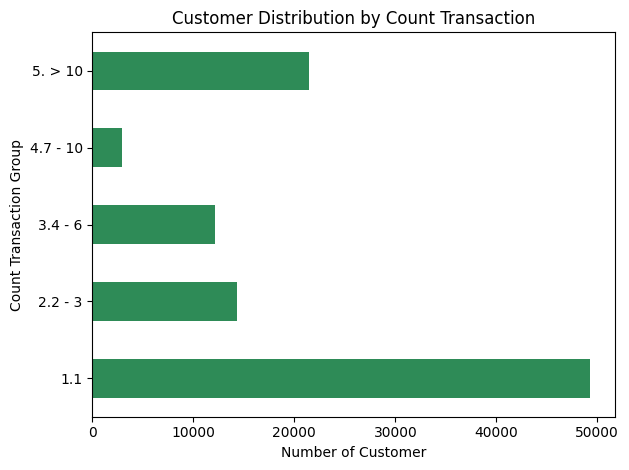

In [27]:
# Plot the data
data_grouped.plot(kind='barh', title = 'Customer Distribution by Count Transaction', color='seagreen')
plt.ylabel('Count Transaction Group')
plt.xlabel('Number of Customer')
plt.tight_layout()
plt.show()

According to the results, 49000 of the clients are "new" customers who have only made one purchase. Customer loyalty can be seen in their continuing use of payment methods. Businesses can use targeted marketing, incentives, or improved customer experiences to attract and convert customers from these segments. We can offer discounts or appealing offers to increase client loyalty.


**Distribution of average transaction amount by category**


By analyzing the distribution of average transaction amount by category, we aim to obtain insights into the spending patterns and profitability of different product categories at DQLab Sport Center.

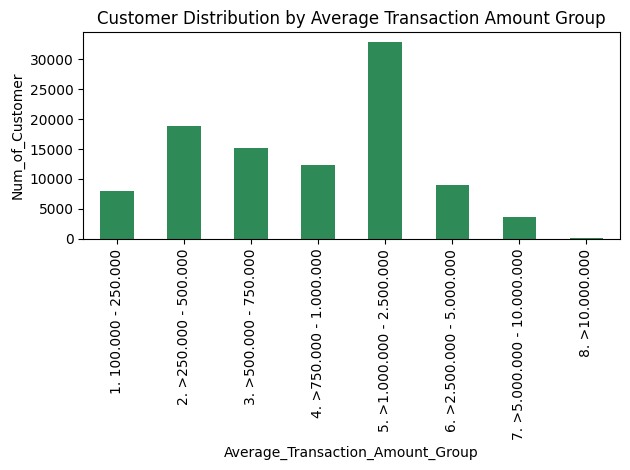

In [28]:
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=250000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val
# Tambahkan kolom baru
data['Average_Transaction_Amount_Group'] = data.apply(f, axis=1)

data_year = data.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
data_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group', color='seagreen')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

The distribution assists in identifying distinct consumer segments based on their average transaction amount. Customers with similar spending habits can be grouped together, allowing for segmented marketing techniques and customised approaches.

This can be beneficial to marketing and sales strategies. We can figure out from the graph that we have a customer in stage 5, where they typically spend >1.000.000 - 2.500.000.


**MODELLING**

In this section, we will then specify the feature columns of the dataset, here the Average_Transaction_Amount, Count_Transaction, and Year_Diff columns are selected. However, the last column does not exist yet. Please create this Year_Diff column first and then assign the dataset with these feature columns as the independent variable X.

For the target, of course, the problem of customers with churn conditions or not, assign the dataset for this target to the dependent y variable.

**Feature Colums and Target**

In [29]:
# Generate new data
data['Year_diff'] = data['Year_Last_Transaction']-data['Year_First_Transaction']

In [30]:
data.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group,Average_Transaction_Amount_Group,Year_diff
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False,2016,2018,5. > 10,5. >1.000.000 - 2.500.000,2
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False,2014,2018,5. > 10,5. >1.000.000 - 2.500.000,4
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019,5. > 10,2. >250.000 - 500.000,2
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False,2017,2019,5. > 10,3. >500.000 - 750.000,2
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False,2015,2018,5. > 10,5. >1.000.000 - 2.500.000,3


In [31]:
data['is_churn'] = data['is_churn'].astype(bool)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Customer_ID                       100000 non-null  int64         
 1   Product                           100000 non-null  object        
 2   First_Transaction                 100000 non-null  datetime64[ns]
 3   Last_Transaction                  100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount        100000 non-null  int64         
 5   Count_Transaction                 100000 non-null  int64         
 6   is_churn                          100000 non-null  bool          
 7   Year_First_Transaction            100000 non-null  int64         
 8   Year_Last_Transaction             100000 non-null  int64         
 9   Count_Transaction_Group           100000 non-null  object        
 10  Average_Transaction_Amount_Group 

In [33]:
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_diff']

In [34]:
X = data[feature_columns]
y = data['is_churn']

In [35]:
X.head()

,Average_Transaction_Amount,Count_Transaction,Year_diff
0,1467681,22,2
1,1269337,41,4
2,310915,30,2
3,722632,27,2
4,1775036,25,3


In [36]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

For modelling, we'll use logistic regression. Logistic regression is often recommended for churn analysis due to its advantages. Firstly, it is suitable for binary classification tasks, making it a natural choice for predicting churn. Secondly, logistic regression provides interpretable results, allowing for a clear understanding of the impact of features on churn likelihood. Thirdly, it can achieve good predictive performance by capturing both linear and non-linear relationships between features and churn. Additionally, logistic regression has fewer assumptions compared to other models, making it more flexible. Lastly, it is computationally efficient and scalable, enabling its application to large datasets. Overall, logistic regression combines simplicity, interpretability, and predictive power, making it a reliable choice for churn analysis.

**Train, Predict, and Evaluate Model**

In [37]:
LogReg = LogisticRegression()

In [38]:
# Fit the model with data
LogReg.fit(X_train, y_train)

LogisticRegression()

In [39]:
# Predict model
y_pred=LogReg.predict(X_test)

In [40]:
# Evaluate model with confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[    0,  6663],
       [    1, 13336]])

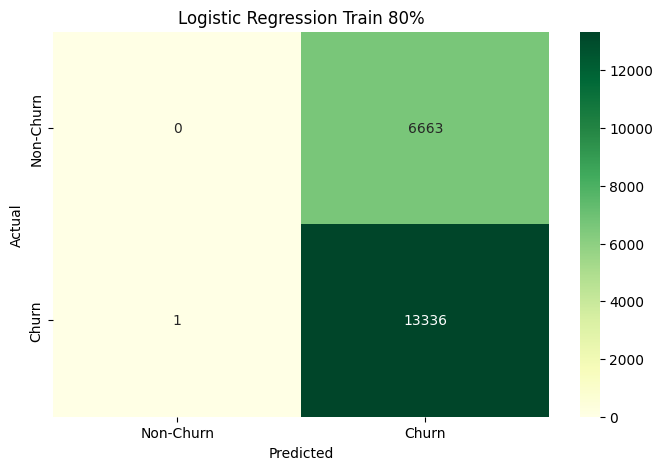

In [41]:
labels = ['Non-Churn', 'Churn']
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cnf_matrix, annot = True, fmt=".0f", ax=ax, cmap='YlGn')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression Train 80%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Accuracy, Precision and Recall**

In [42]:
# accuracy
LogReg_acc = accuracy_score(y_test, y_pred)

# precision
LogReg_prec = precision_score (y_test, y_pred, average='micro')

# recall
LogReg_rec = recall_score(y_test, y_pred, average='micro')

# f1 score
LogReg_fsc = f1_score(y_test, y_pred, average='micro')

In [43]:
Logistic_Regression = pd.DataFrame({'LogReg' :[LogReg_acc, LogReg_prec, LogReg_rec, LogReg_fsc]},
                                   index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
Logistic_Regression

,LogReg
ACCURACY,0.6668
PRECISION,0.6668
RECALL,0.6668
F1 SCORE,0.6668
